In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
def plot_duplicates(abs_genome_freq, rel_genome_freq):
    """
    Plot the number of duplicates per genome.
    """
    fig, ax = plt.subplots(figsize=(20, 60))

    abs_genome_freq.plot.barh(ax=ax, color='blue', alpha=0.5, label='Absolute duplicates')
    rel_genome_freq.plot.barh(ax=ax, color='red', alpha=0.5, label='Relative duplicates')

    plt.title('Number of duplicates per genome')
    plt.xlabel('Genome frequency')
    plt.ylabel('Genome')
    plt.legend()
    plt.show()

In [111]:
def genome_boxplot(df, title, color):
    """
    Create a boxplot for each genome.
    """
    plt.figure(figsize=(20, 10))

    # melt and logscale genomes
    df_melted = np.log1p(df).melt(var_name='Amino', value_name='Count')

    # create a boxplot for each genome
    sns.boxplot(x='Amino', y='Count', data=df_melted, color=color)

    plt.title(title)
    plt.xlabel('Amino')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [112]:
def plot_genome_density(df, gene, ax):
    """
    Plot the density of a specific genome.
    """
    sns.histplot(data=np.log1p(df), x=gene, bins=30, kde=True, ax=ax)
    ax.set_title(f'{gene} Density (log-scaled)')
    ax.set_xlabel('Counts')
    ax.set_ylabel('Frequency')

In [130]:
def plot_heatmap(df):
    """
    Plot a heatmap of log-scaled counts.
    """
    plt.figure(figsize=(30, 160))
    sns.heatmap(np.log1p(df), cmap='viridis')

    plt.title('Heatmap of top Counts')
    plt.xlabel('Amino')
    plt.ylabel('Replicate')
    plt.show()

In [113]:
#import data
abs_df = pd.read_csv('../data/d__Bacteria_absolute_freqs_ed.tsv', sep='\t', index_col=0)
rel_df = pd.read_csv('../data/d__Bacteria_rel_syn_freqs_ed.tsv', sep='\t', index_col=0)

In [114]:
# make indices start from 0
abs_df = abs_df.reset_index(drop=True)
rel_df = rel_df.reset_index(drop=True)

# check if the set of genomes is the same
print(set(abs_df["genome"]) == set(rel_df["genome"]))

True


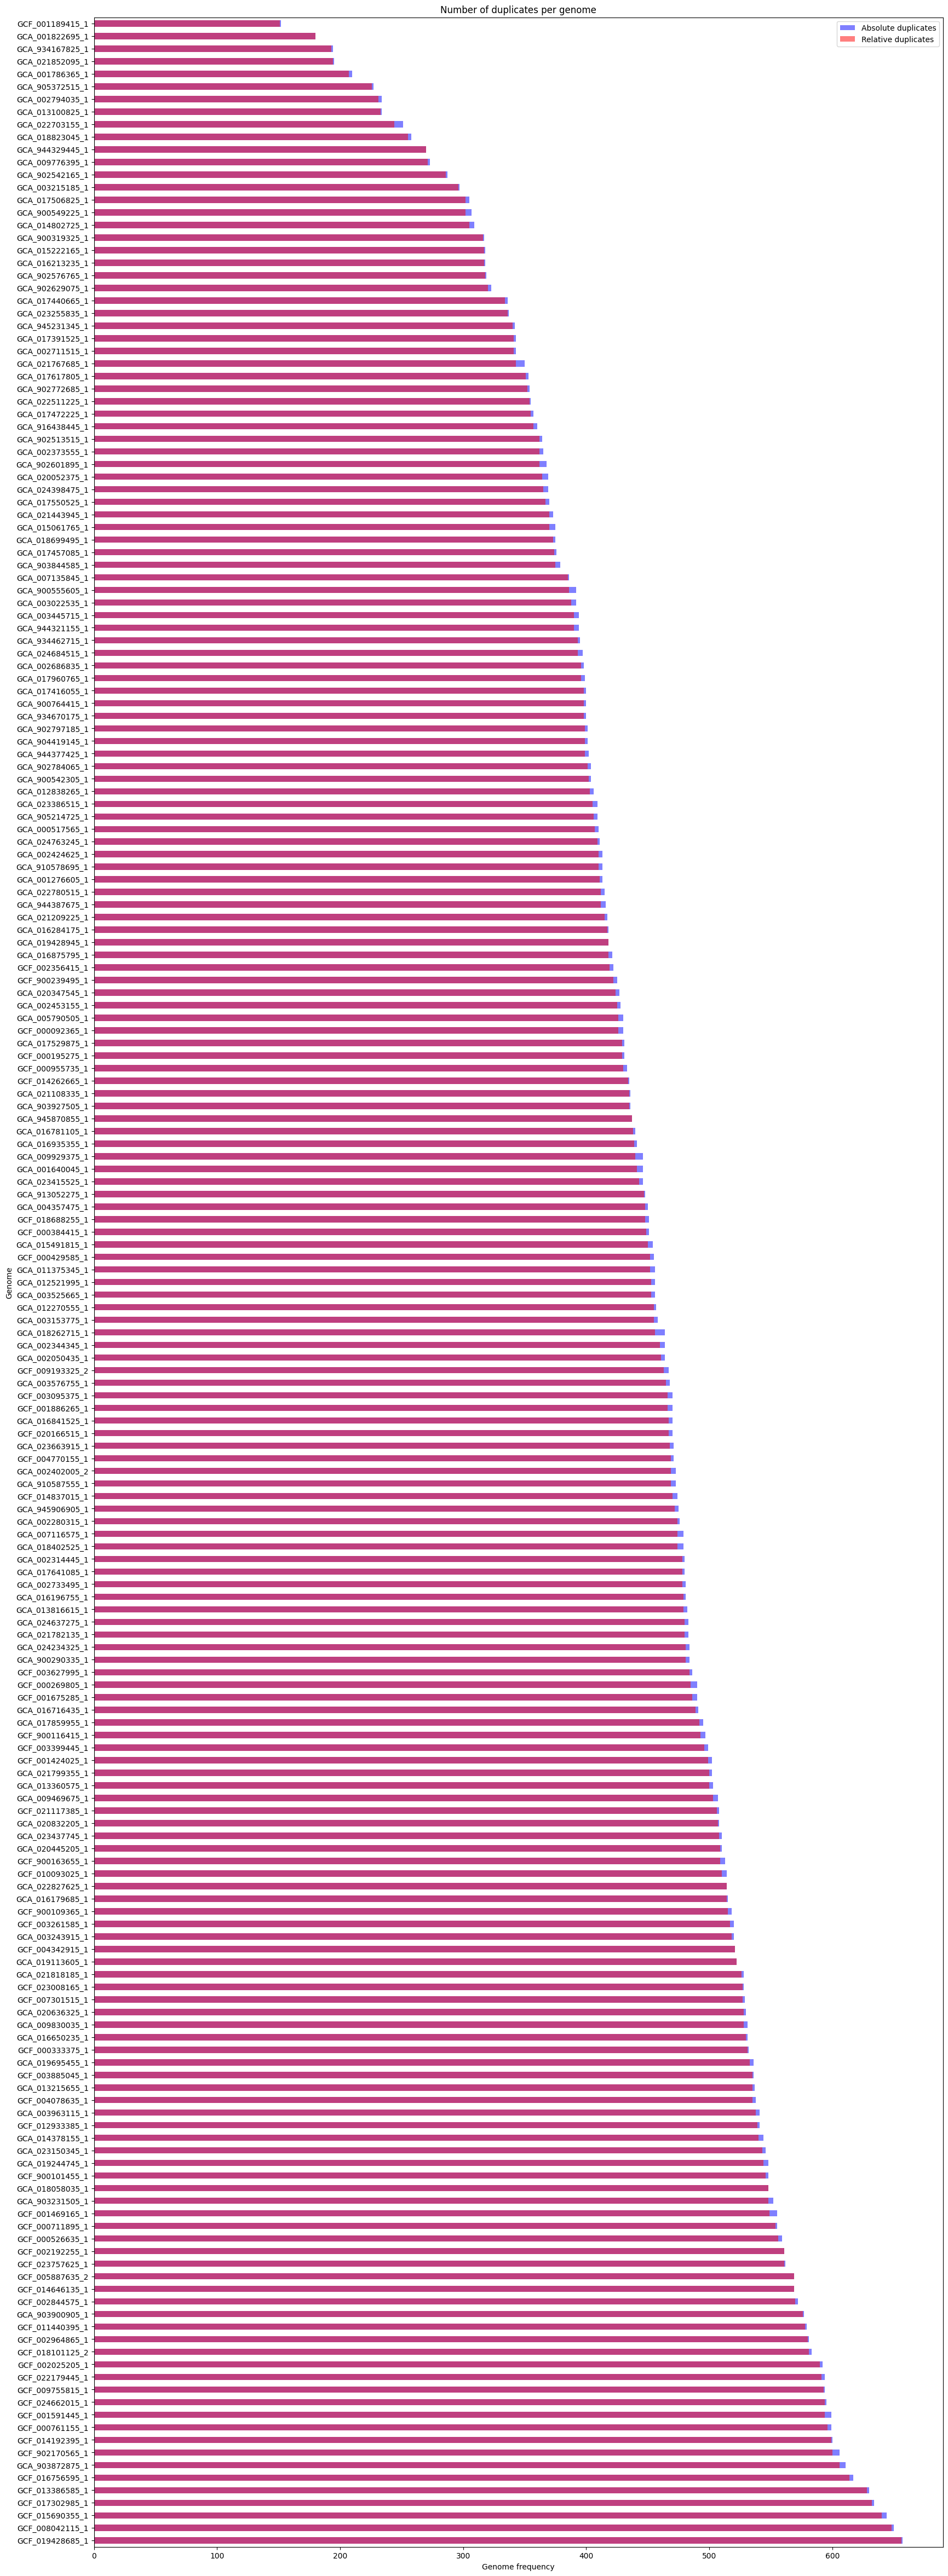

In [115]:
# there are duplicated genomes
abs_genome_freq = abs_df['genome'].value_counts()
rel_genome_freq = rel_df['genome'].value_counts()

plot_duplicates(abs_genome_freq, rel_genome_freq)

- Question: how do we deal with genome duplicates?

In [116]:
# set of amino acids names
amino_abs = set(abs_df.columns)
amino_rel = set(rel_df.columns)

amino_abs.difference(amino_rel)

{'ATG', 'TAA', 'TAG', 'TGA', 'TGG'}

- Question: 5 amino acids are missing in the relative data

In [117]:
# select only overlapping amino acids
amio_intersect = amino_rel.intersection(amino_abs)

# remove abundant features
vals = ['genome', 'source', 'accession', 'name']
for val in vals:
    amio_intersect.discard(val)

# select only counts
abs_counts = abs_df.loc[:, list(amio_intersect)]
rel_counts = rel_df.loc[:, list(amio_intersect)]

abs_counts.shape, rel_counts.shape

((90290, 59), (89767, 59))

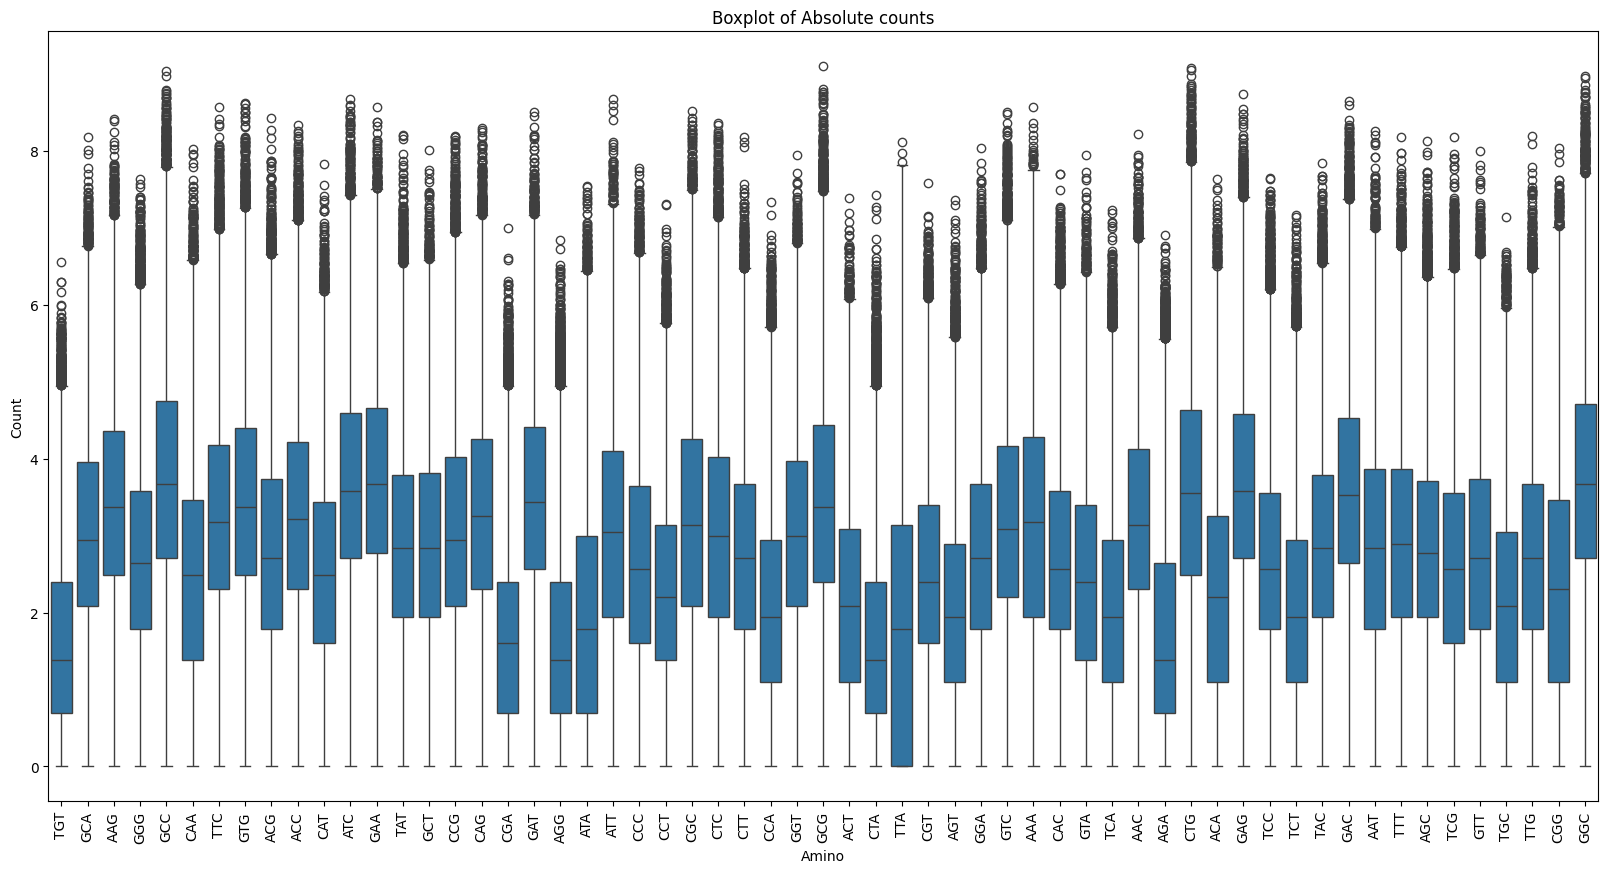

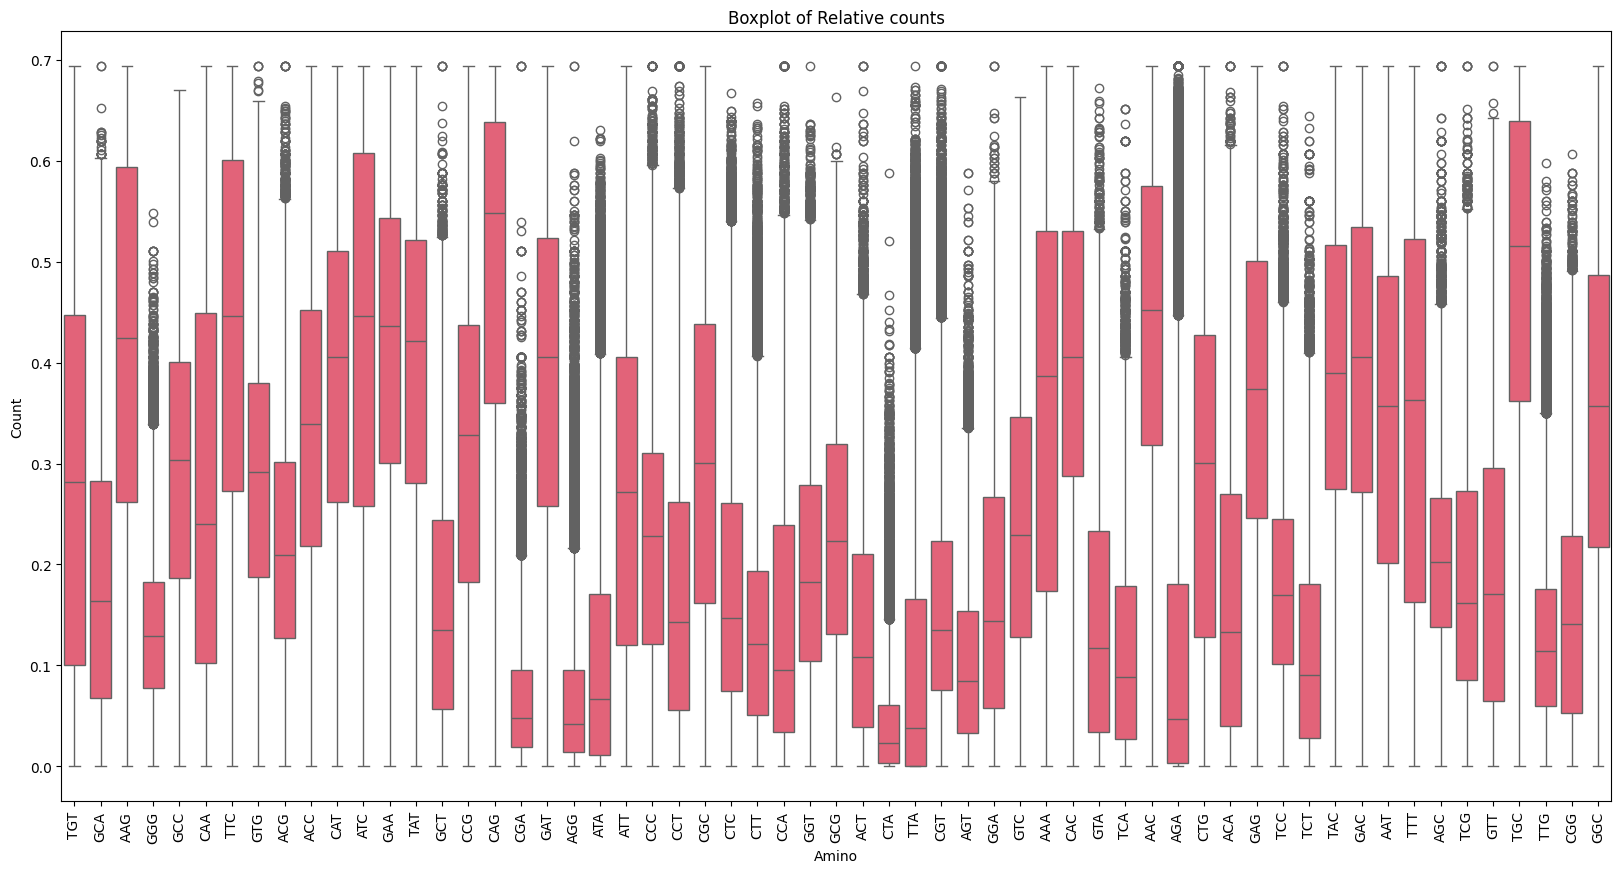

In [118]:
genome_boxplot(abs_counts, 'Boxplot of Absolute counts', '#1F77B4')
genome_boxplot(rel_counts, 'Boxplot of Relative counts', '#F74E6B')

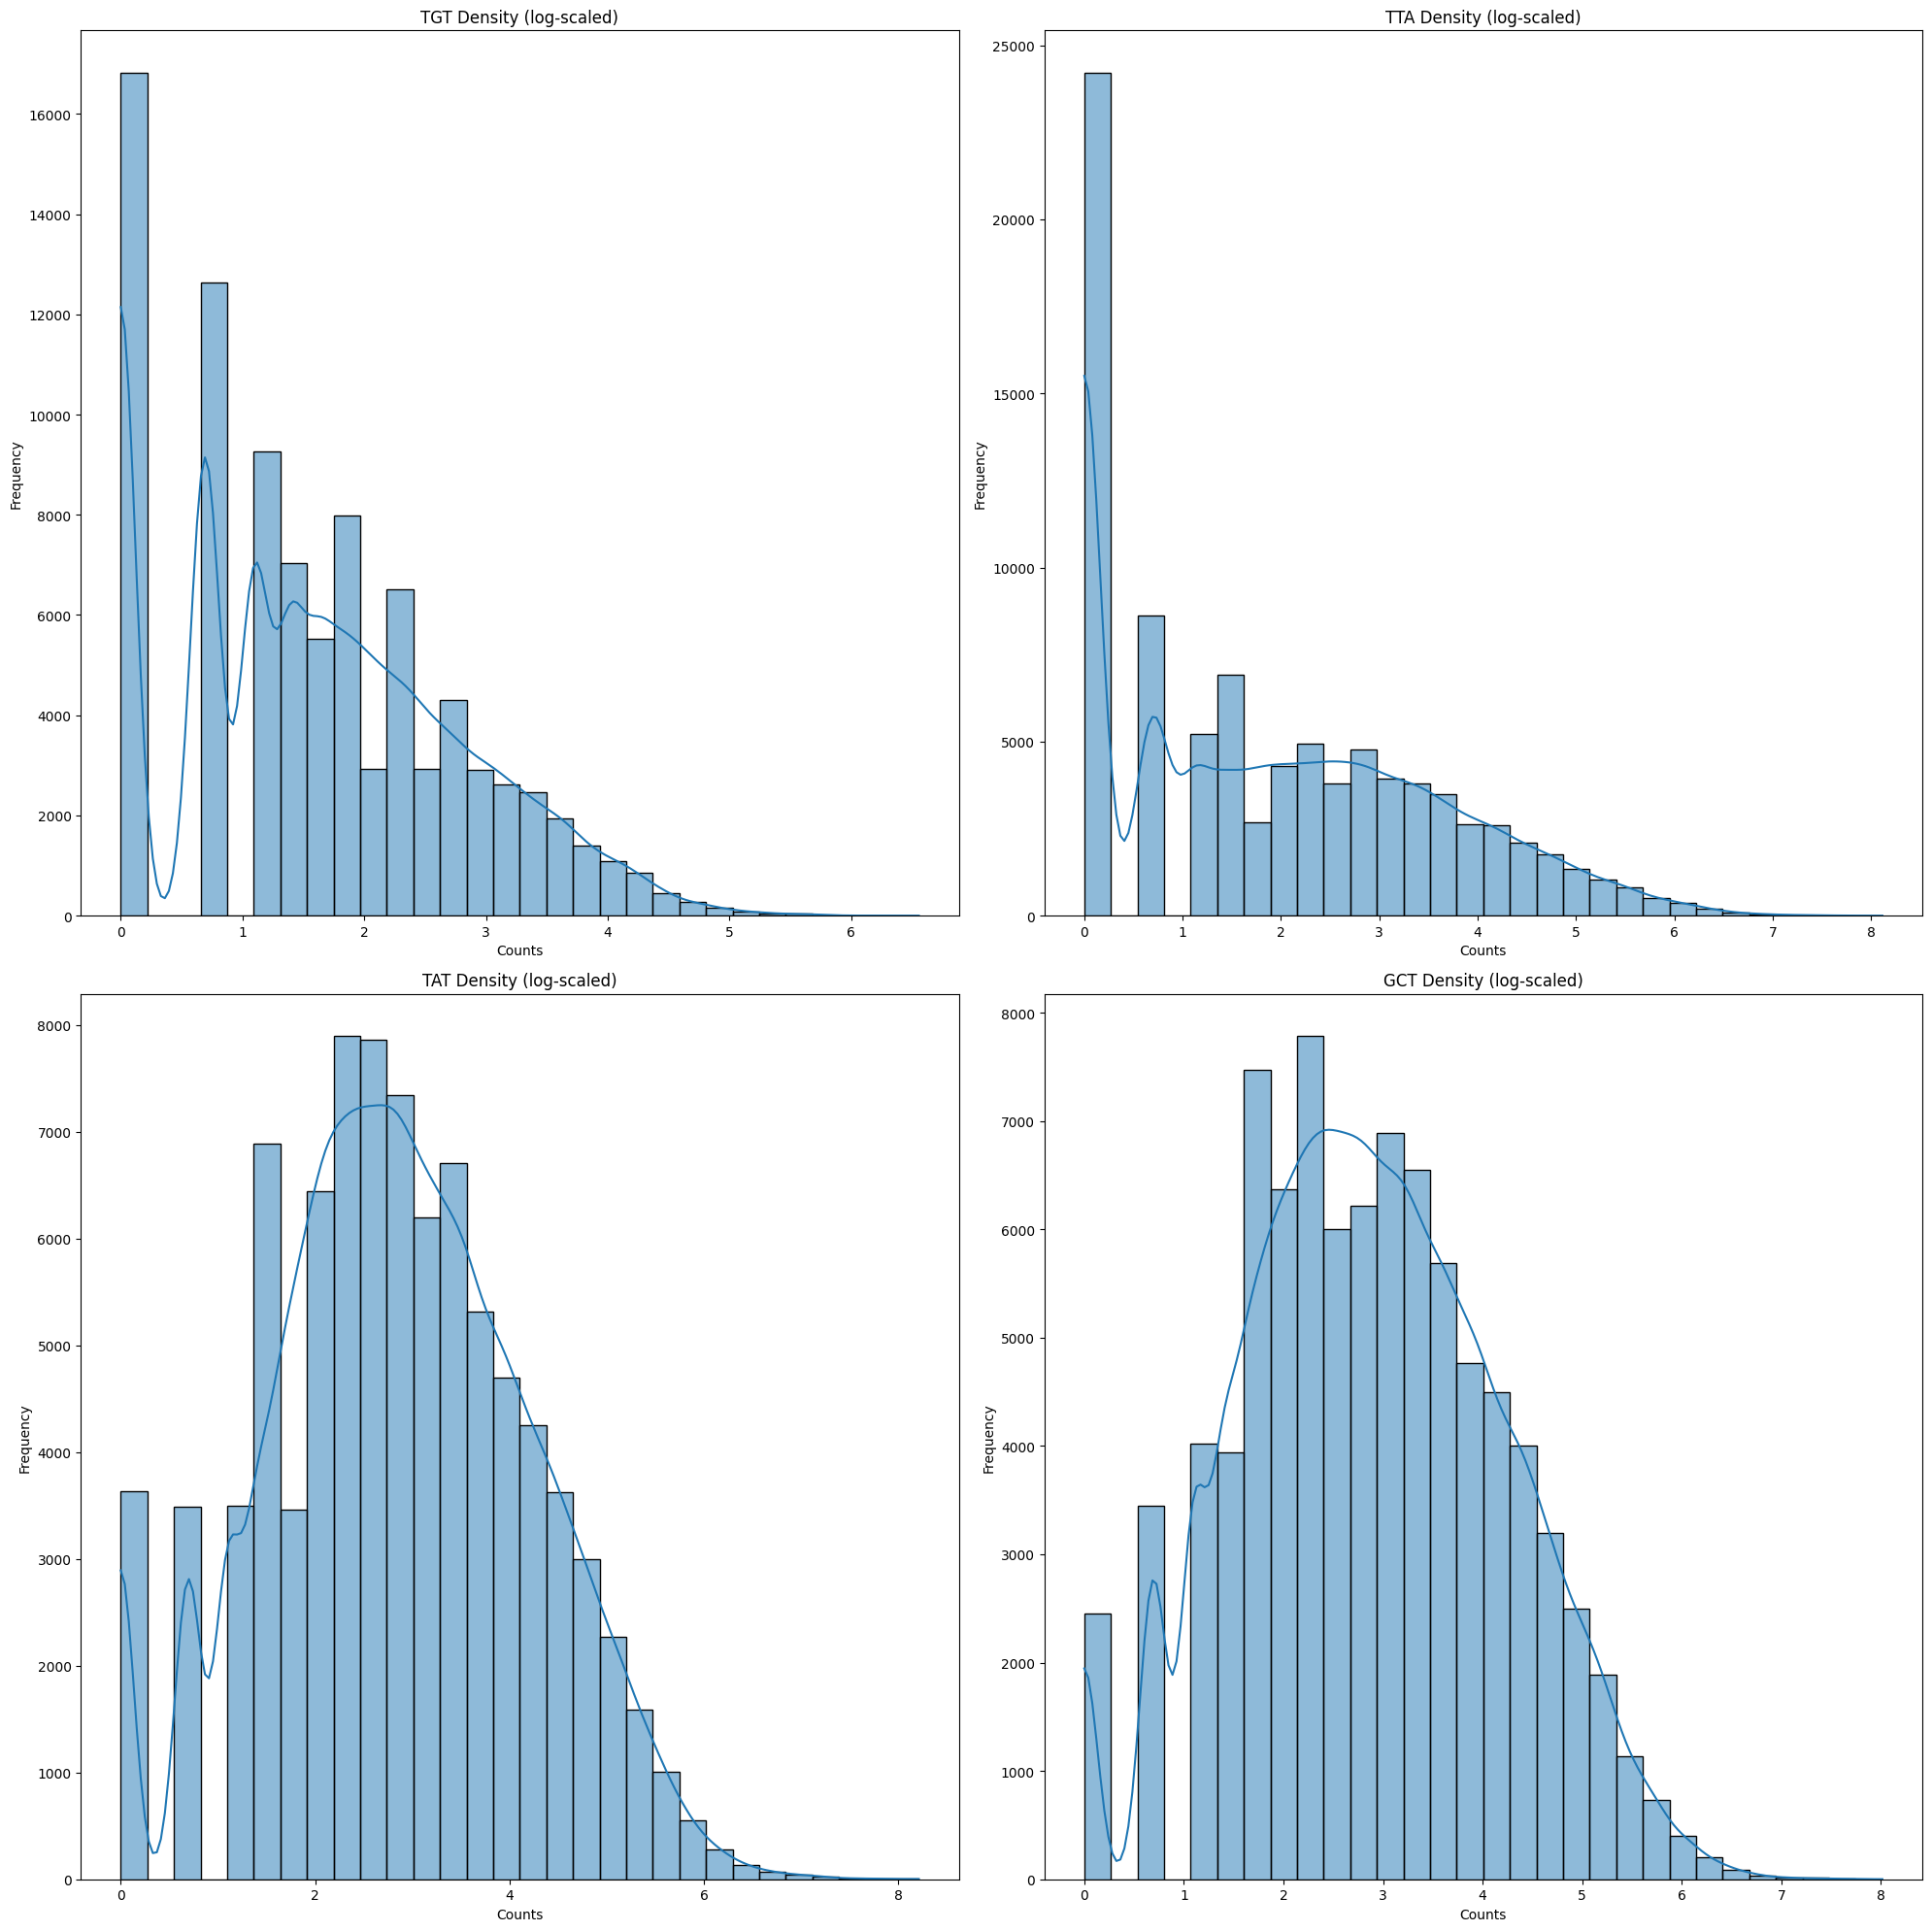

In [119]:
# check densities of some genomes
genes = ['TGT', 'TTA', 'TAT', 'GCT']

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

for i, gene in enumerate(genes):
    row = i // 2
    col = i % 2
    plot_genome_density(abs_counts, gene, axs[row, col])

plt.tight_layout()
plt.show()

- Question: how would you explain TTA behaviour?

In [126]:
# pick the most frequent genome
top_genome_ix = abs_df[abs_df['genome'] == 'GCF_019428685_1'].index
len(top_genome_ix)

657

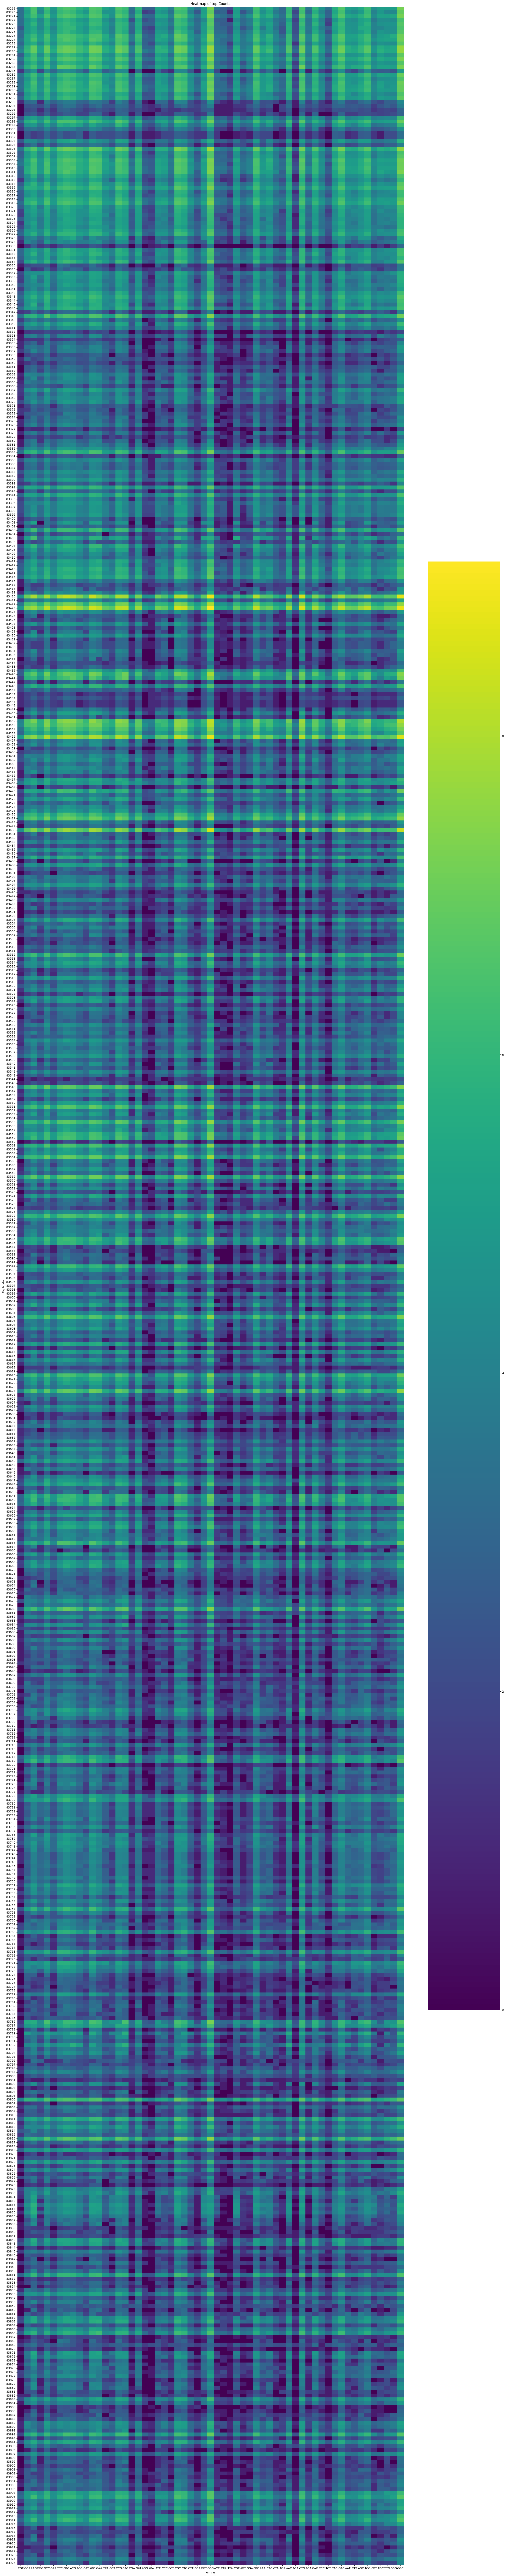

In [133]:
top_counts = abs_counts.loc[top_genome_ix]

plot_heatmap(top_counts)

- Question: is it possible get the data on a individual gene level?

<!-- e.g., 
                      TGT GCA AAG ... GGC
              gene_1
genome_1      gene_2
               ...
              gene_n
...
                      TGT GCA AAG ... GGC
              gene_1
genome_k      gene_2
               ...
              gene_p -->

e.g.,
                    TGT GCA AAG ... GGC
              gene_1
genome_1      gene_2
               ...
              gene_n

                    TGT GCA AAG ... GGC
              gene_1
genome_k      gene_2
               ...
              gene_p